# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三倍         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

## 1. import data

In [27]:
#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:   
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [83]:
# 讀檔
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


## 基礎統計分析

### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [84]:
# 轉換類別資料
df['gender'] = df['gender'].apply({'male':0, 'female':1}.get)

df['children'] = df['children'].apply({'no':0, 'yes':1}.get)

# 將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1
df['affairs'] = df['affairs'].apply(lambda x: 1 if x > 0 else 0)
df = df.rename(columns={'affairs': 'ynaffair'})

df.head()


,ynaffair,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,0,37.0,10.00,0,3,18,7,4
1,0,1,27.0,4.00,0,4,14,6,4
2,0,1,32.0,15.00,1,1,12,1,4
3,0,0,57.0,15.00,1,5,18,6,5
4,0,0,22.0,0.75,0,2,17,6,3


In [85]:
# 基礎統計分析
df.describe()

,ynaffair,gender,age,yearsmarried,children,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.249584,0.524126,32.487521,8.177696,0.715474,3.116473,16.166389,4.194676,3.931780
std,0.433133,0.499834,9.288762,5.571303,0.451564,1.167509,2.402555,1.819443,1.103179
min,0.000000,0.000000,17.500000,0.125000,0.000000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,0.000000,27.000000,4.000000,0.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,1.000000,32.000000,7.000000,1.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,1.000000,37.000000,15.000000,1.000000,4.000000,18.000000,6.000000,5.000000
max,1.000000,1.000000,57.000000,15.000000,1.000000,5.000000,20.000000,7.000000,5.000000


In [86]:
# 檢查空值
df.isnull().sum()

ynaffair         0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

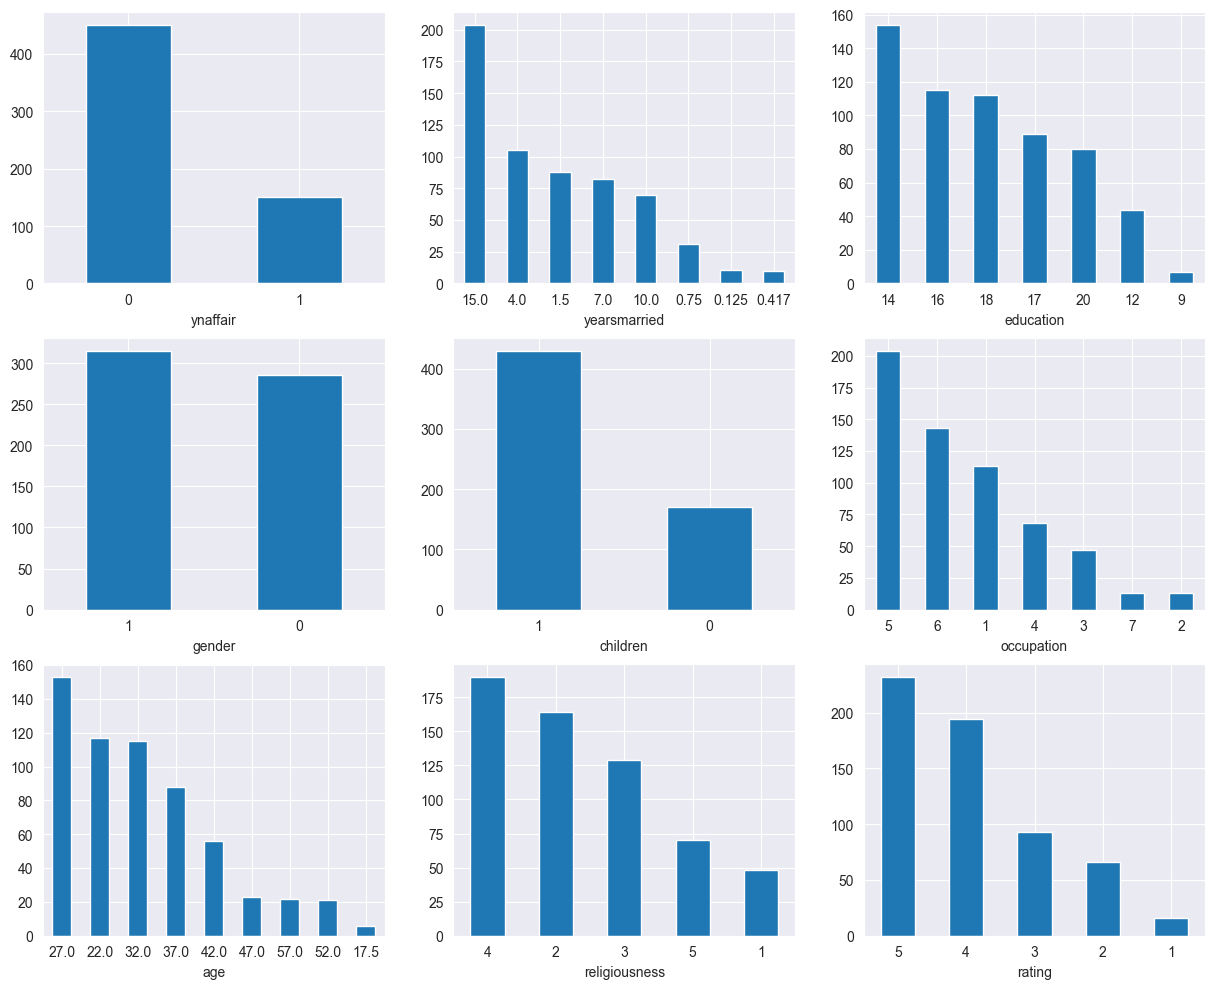

In [87]:
# 各因子人數分布狀況
factor = ['ynaffair','gender','age','yearsmarried','children',
           'religiousness','education','occupation','rating']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(factor):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)

#### 各因子外遇比例

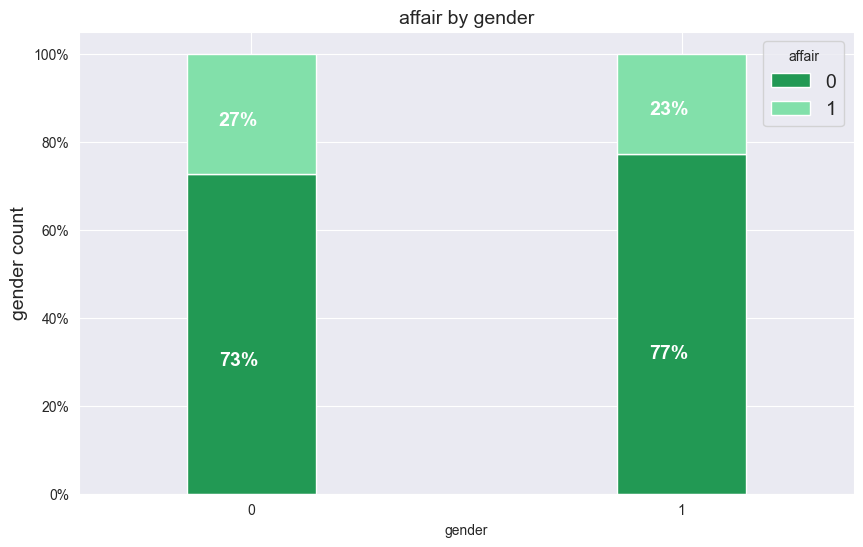

In [88]:
# 男生多一點點
colors = ['#229954','#82E0AA']
gender_affair = df.groupby(['gender','ynaffair']).size().unstack()
ax = (gender_affair.T*100.0 / gender_affair.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('gender count',size = 14)
ax.set_title('affair by gender',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)

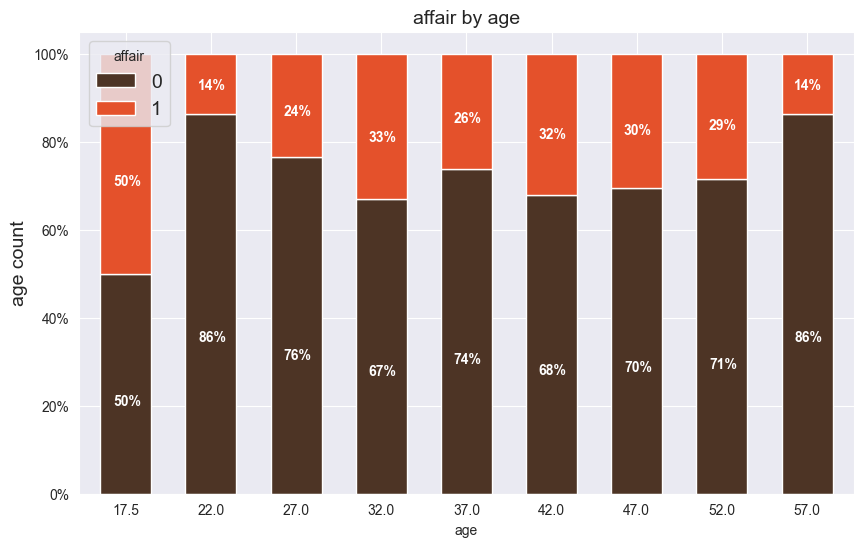

In [89]:

# 20 歲以下特別高
colors = ['#4D3425','#E4512B']
age_affair = df.groupby(['age','ynaffair']).size().unstack()
ax = (age_affair.T*100.0 / age_affair.T.sum()).T.plot(kind='bar', width = 0.6, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('age count',size = 14)
ax.set_title('affair by age',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 10)

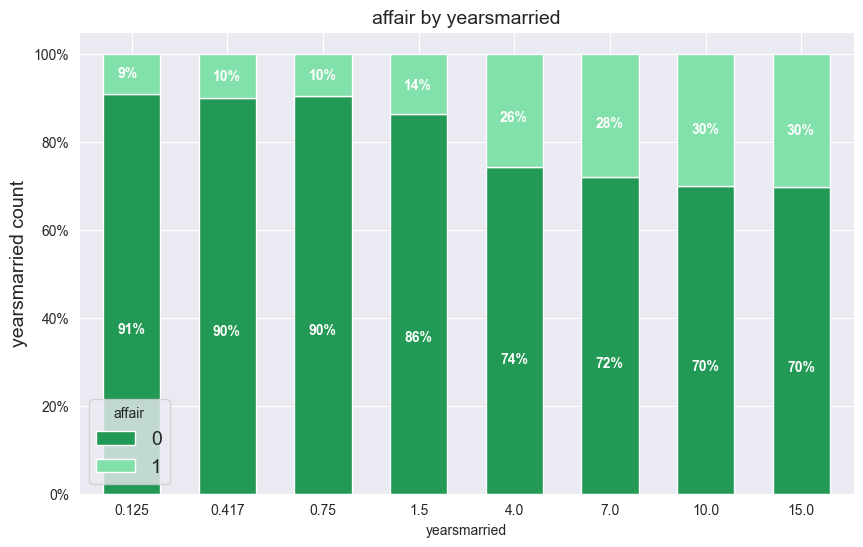

In [90]:
# 隨著結婚長度升高
colors = ['#229954','#82E0AA']
yearsmarried_affair = df.groupby(['yearsmarried','ynaffair']).size().unstack()
ax = (yearsmarried_affair.T*100.0 / yearsmarried_affair.T.sum()).T.plot(kind='bar', width = 0.6, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('yearsmarried count',size = 14)
ax.set_title('affair by yearsmarried',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 10)

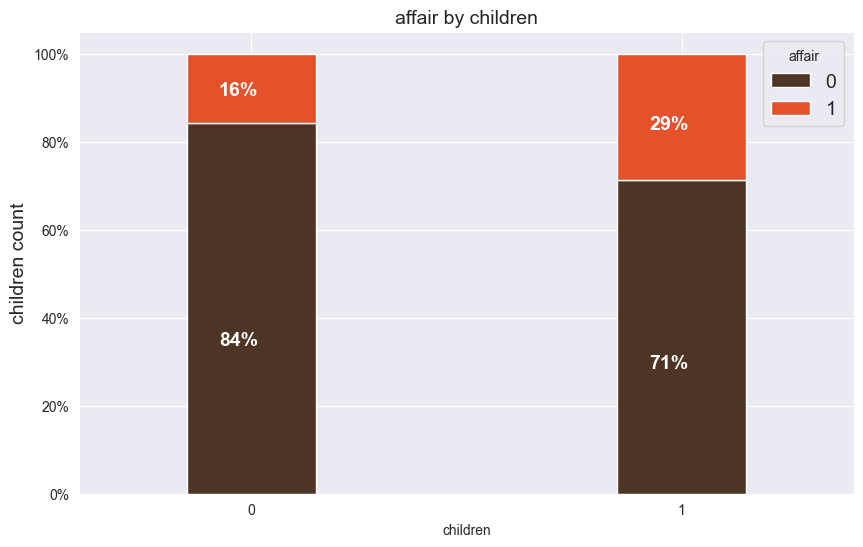

In [91]:
# 有小孩較高
colors = ['#4D3425','#E4512B']
children_affair = df.groupby(['children','ynaffair']).size().unstack()
ax = (children_affair.T*100.0 / children_affair.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('children count',size = 14)
ax.set_title('affair by children',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)

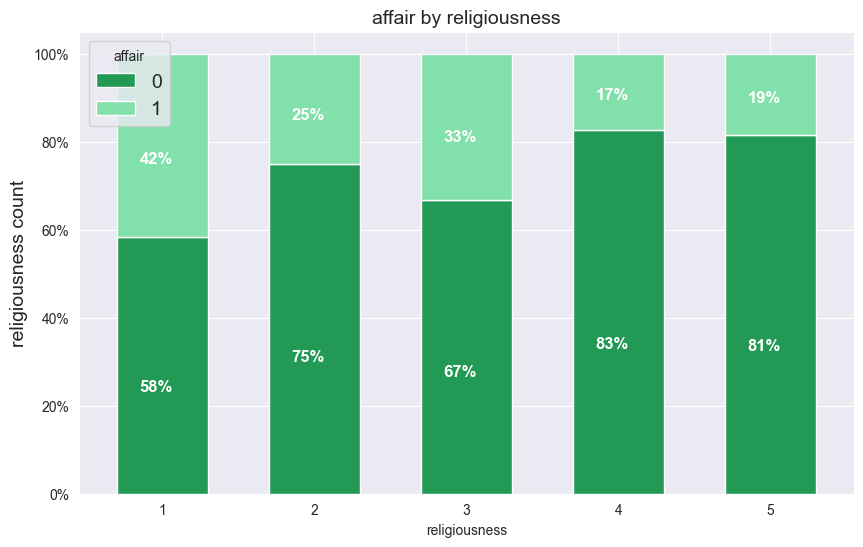

In [92]:
# 反宗教 跟 輕微宗教信仰較高
colors = ['#229954','#82E0AA']
religiousness_affair = df.groupby(['religiousness','ynaffair']).size().unstack()
ax = (religiousness_affair.T*100.0 / religiousness_affair.T.sum()).T.plot(kind='bar', width = 0.6, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('religiousness count',size = 14)
ax.set_title('affair by religiousness',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 12)

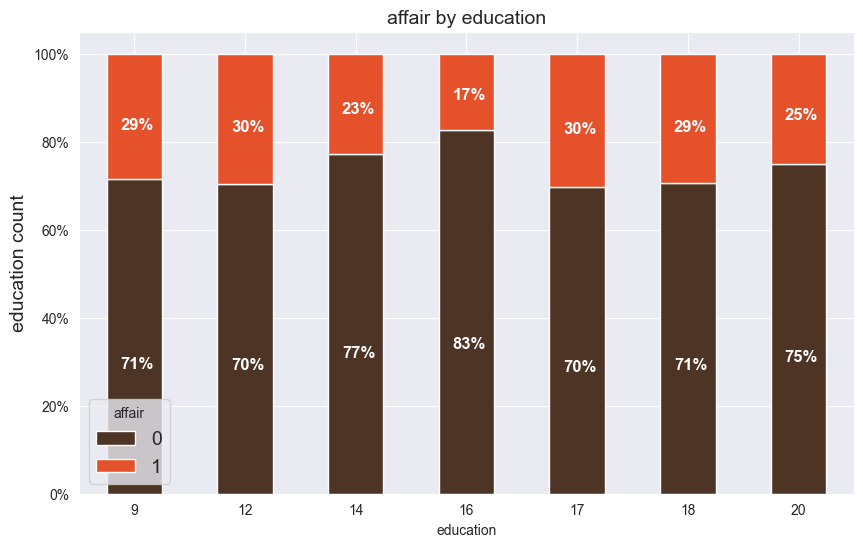

In [93]:
# 沒有甚麼明顯差異 只有大學畢業生特別低
colors = ['#4D3425','#E4512B']
education_affair = df.groupby(['education','ynaffair']).size().unstack()
ax = (education_affair.T*100.0 / education_affair.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('education count',size = 14)
ax.set_title('affair by education',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 12)

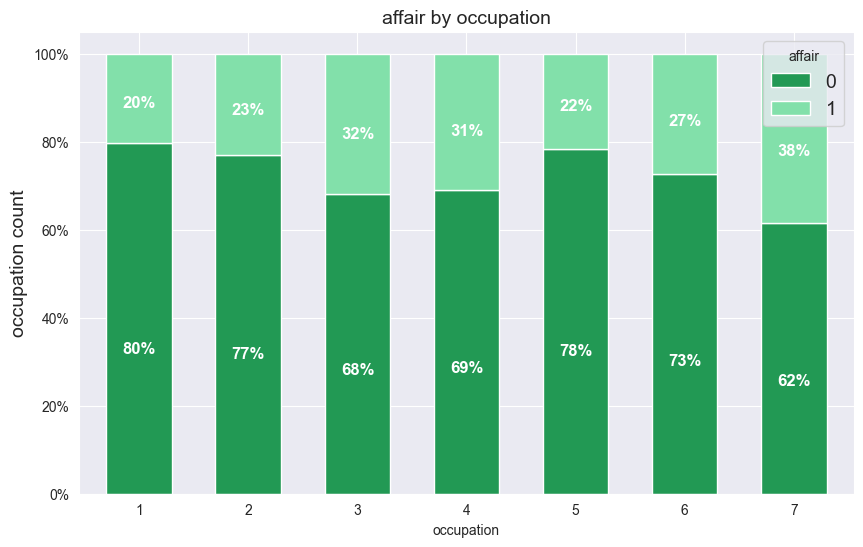

In [94]:
# 7 特別高 但pdf的職業敘述只有1-6 不知道7是什麼
colors = ['#229954','#82E0AA']
occupation_affair = df.groupby(['occupation','ynaffair']).size().unstack()
ax = (occupation_affair.T*100.0 / occupation_affair.T.sum()).T.plot(kind='bar', width = 0.6, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('occupation count',size = 14)
ax.set_title('affair by occupation',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 12)

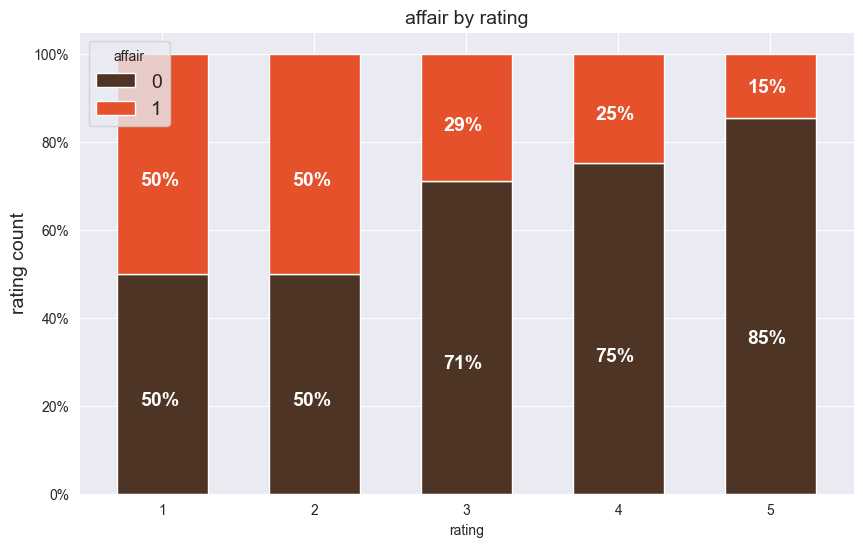

In [95]:
# 婚姻滿意度低 外遇比例明顯較高
colors = ['#4D3425','#E4512B']
rating_affair = df.groupby(['rating','ynaffair']).size().unstack()
ax = (rating_affair.T*100.0 / rating_affair.T.sum()).T.plot(kind='bar', width = 0.6, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affair')
ax.set_ylabel('rating count',size = 14)
ax.set_title('affair by rating',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)

## 模型

In [108]:
# 取出ynaffair 當作y 設定為欄向量
y = df['ynaffair'].values
# 剩下的當作x
x = df.drop(columns = ['ynaffair'])

# 將x 縮放到0-1之間
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [110]:
# 分割訓練集與預測集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### 跑 Logistic Regression

In [119]:
# 跑 Logistic Regression
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)

y_test_pred_log = model_log.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))

0.8264462809917356


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

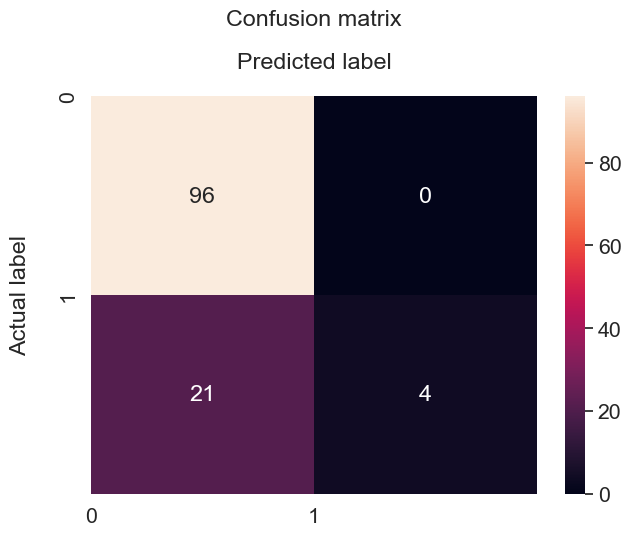

In [120]:
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_log) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [122]:
# recall/sensitivity 太低 錯放太多外遇的人
print(f'Accuracy : {round((4+96)/(4+0+96+21),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((4)/(4+0), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((4)/(4+21), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((96)/(96+0), 3)}')            # TN / (TN + FP)

Accuracy : 0.826
Precision : 1.0
Recall/Sensitivity : 0.16
Specificity : 1.0


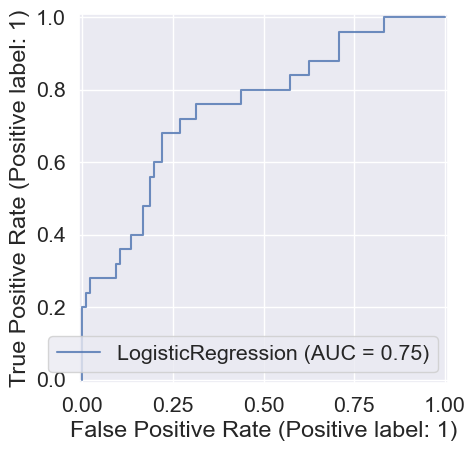

In [121]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
# 選擇結果為 1 的機率
y_test_proba = model_log.predict_proba(X_test)[:, 1]  

# 設定閾值
threshold = 0.38
y_test_pred_log_custom = (y_test_proba >= threshold).astype(int)

print (metrics.accuracy_score(y_test, y_test_pred_log_custom))

0.768595041322314


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

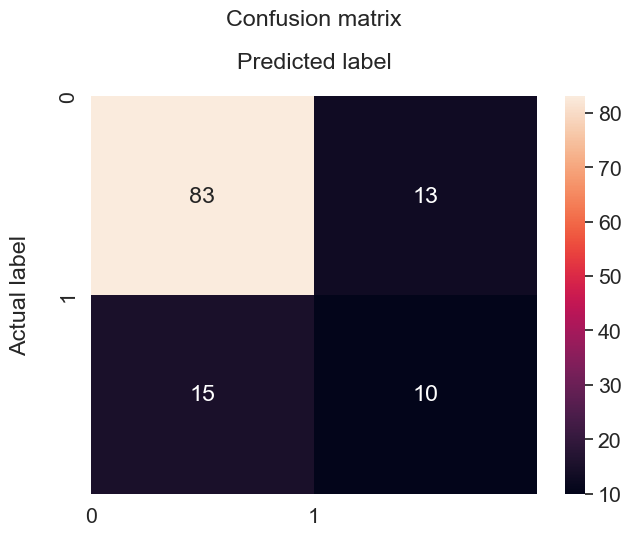

In [137]:
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_log_custom) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [138]:
# 調整閥值後的結果
print(f'Accuracy : {round((10+83)/(10+13+83+15),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((10)/(10+13), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((10)/(10+15), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((83)/(83+13), 3)}')            # TN / (TN + FP)

Accuracy : 0.769
Precision : 0.435
Recall/Sensitivity : 0.4
Specificity : 0.865


Axes(0.125,0.11;0.775x0.77)


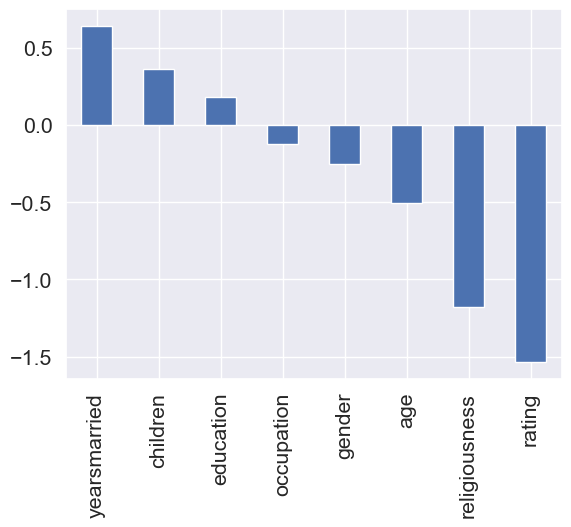

In [ ]:
weights = pd.Series(model_log.coef_[0], index=x.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

- 結婚越久 有小孩 較容易外遇
- 對婚姻評價高 宗教信仰程度高 較不容易外遇 

## 跑 SVM

In [142]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.7851239669421488

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

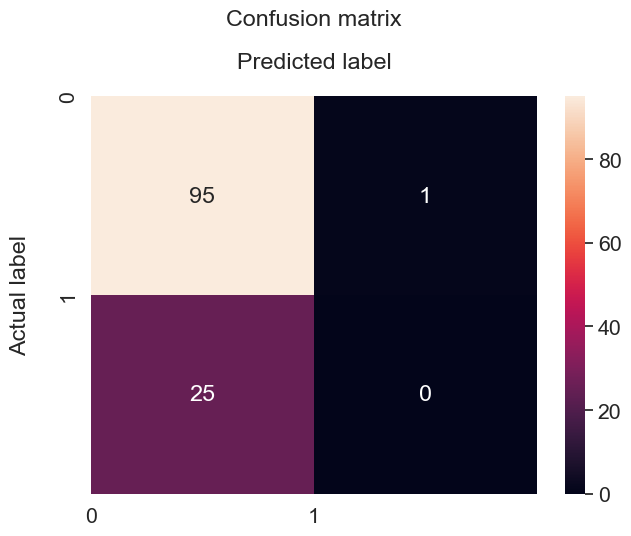

In [143]:
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [144]:
# 完全沒有預測到實際有偷吃的人
print(f'Accuracy : {round((0+95)/(0+1+95+25),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((0)/(0+1), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((0)/(0+25), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((95)/(95+1), 3)}')            # TN / (TN + FP)

Accuracy : 0.785
Precision : 0.0
Recall/Sensitivity : 0.0
Specificity : 0.99


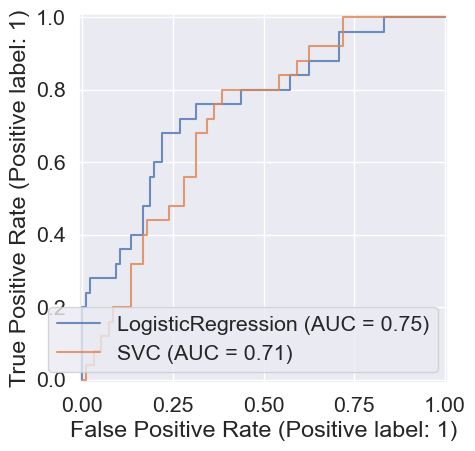

In [145]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

preprocessor = make_pipeline(SelectKBest(f_classif, k=10))  # 僅保留好的K個變數
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))